In [17]:
# Data preprocessing
#0 denotes no priors. gt0 denotes greater than 0 priors
#Priors = 0 

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

file = open(r"Future/compas-scores-two-years-corrected.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

priors_0_scores = [score_text[x] for x in range(len(score_text)) if int(priors_count[x]) == 0 and sex[x] == 'Male']


priors_gt0_scores = [score_text[x] for x in range(len(score_text)) if int(priors_count[x]) > 0 and
                     sex[x] == 'Male']

Null hypothesis (proposed distribution): [0.513, 0.487]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.83609000619145e-91.
Any plausible distribution must boost probability over the given distribution by 2.7231780485377e+89, and will therefore have a minimum probability of 9.03923555936072e-6.
Closest plausible distribution: [0.2926091395465777, 0.7073908604534223]


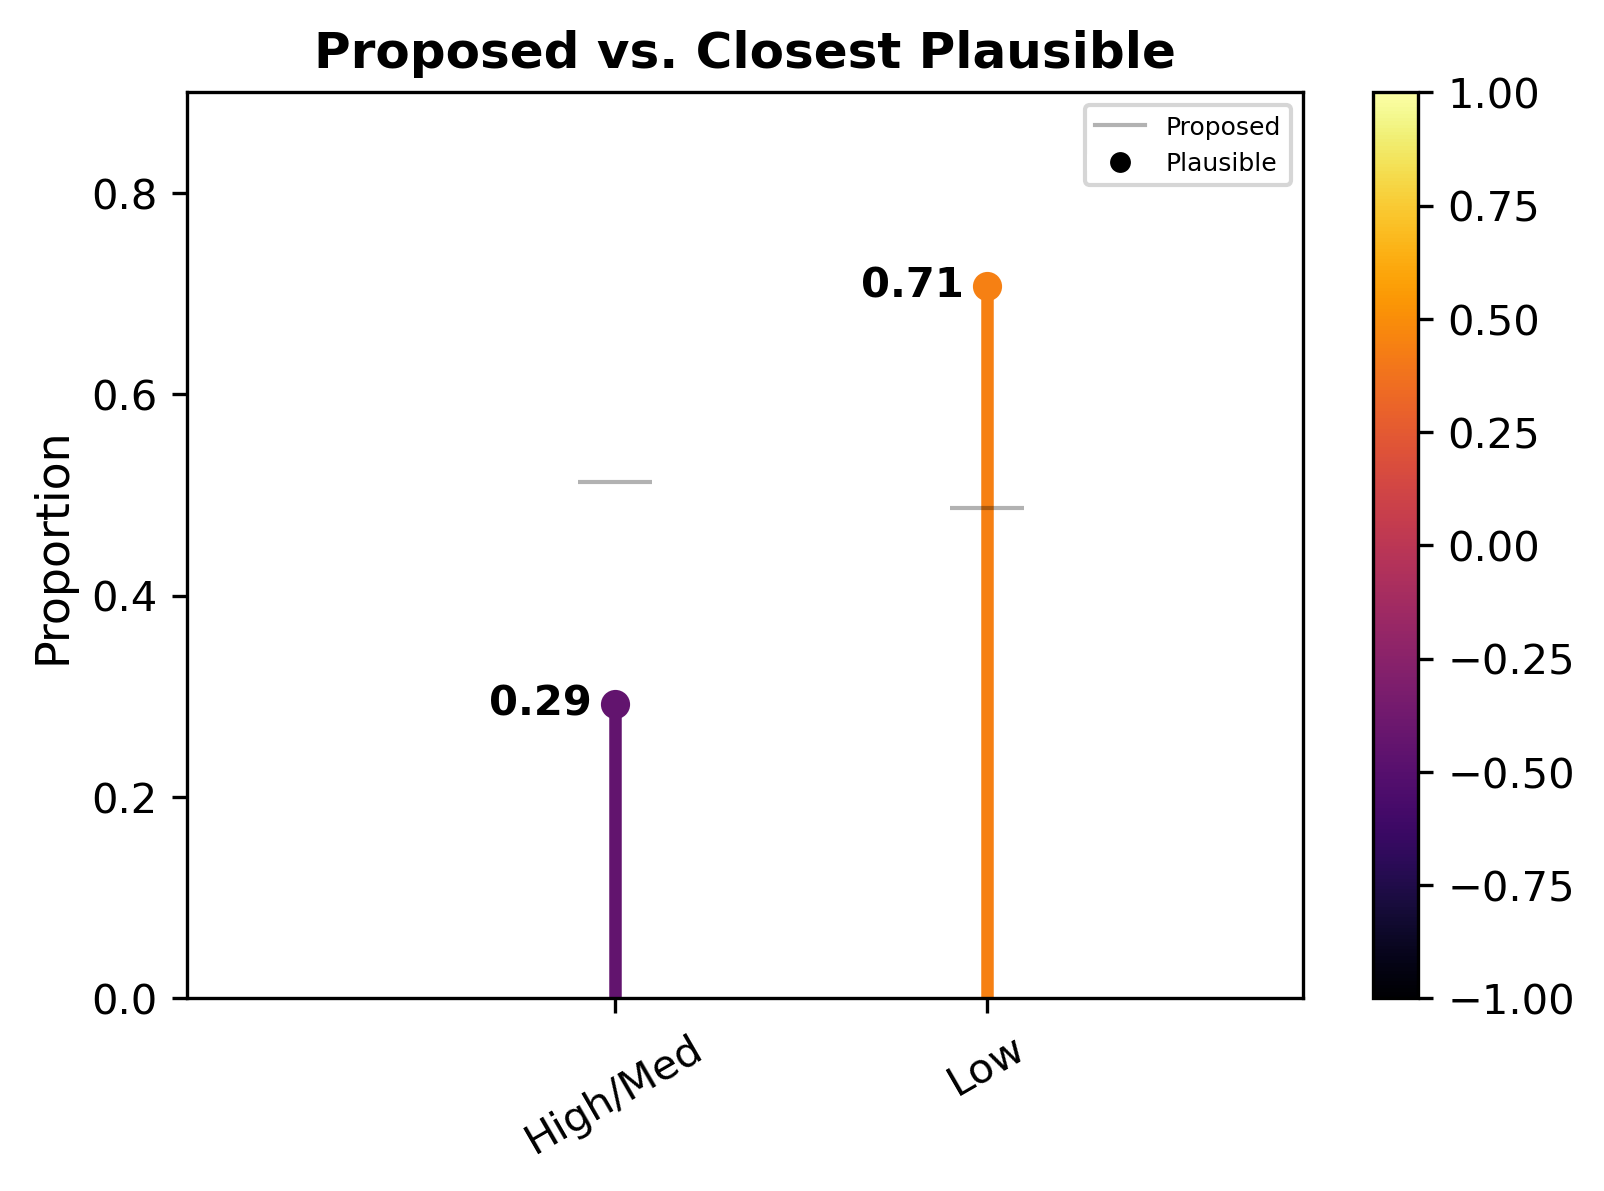

In [18]:
# Setup and Experiments
priors_0_scores = list(filter(lambda x: not x == 'N/A', priors_0_scores))
priors_0_binary = [x if x =='Low' else 'High/Med' for x in priors_0_scores]

#~51.3% of first offenders recidivate within two years according to the Florida Dept. of Corrections
null_props = [.513,1-.513]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

q_null_props = hypothesis_test(priors_0_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)[4]

graph_distributions(q_null_props,\
                    [('High/Med'),('Low')],
                    hypothesis=null_props, xl = [('High/Med'),('Low')], 
                    filename=r"Results/compas_male_priors_0_demo.pdf")

In [21]:
# Setup and Experiments
priors_gt0_scores = list(filter(lambda x: not x == 'N/A', priors_gt0_scores))
priors_gt0_binary = [x if x =='Low' else 'High/Med' for x in priors_gt0_scores]

#~48.7% of repeat offenders recidivate within two years according to the Florida Dept. of Corrections
null_props = [.487,1-.487]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

hypothesis_test(priors_gt0_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)

Null hypothesis (proposed distribution): [0.487, 0.513]

Proposed distribution not rejected at alpha = 0.05. Kardis = 0.121075231692574.


(mpf('0.12107523169257385'), False)